# Markov Chains

Alec Tandoc

In [2]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Markov chain
M = sp.Matrix([
    [0.5, 0.2, 0.3],
    [0.2, 0.6, 0.1],
    [0.3, 0.2, 0.6]
])

In [4]:
orig = sp.Matrix([sp.Rational(1,3), sp.Rational(1,3), sp.Rational(1,3)])
(M**3)*orig

As demonstrated, after 3 years, the Markov chain slightly favors C, with
B being the least favored

In [5]:
plan1 = sp.Matrix([
    [0.5, 0.2 + .6*0.2, 0.3],
    [0.2, 0.6*.8, 0.1],
    [0.3, 0.2, 0.6]
])
plan2 = sp.Matrix([
    [0.5, 0.2, 0.3+0.6*.2],
    [0.2, 0.6, 0.1],
    [0.3, 0.2, 0.6*0.8]
])
plan1

In [6]:
equal = sp.Matrix([sp.Rational(1,3), sp.Rational(1,3), sp.Rational(1,3)])
weight_a = sp.Matrix([sp.Rational(5,10), sp.Rational(25,100), sp.Rational(25,100)])
weight_b = sp.Matrix([sp.Rational(25,100), sp.Rational(5,10), sp.Rational(25,100)])
weight_c = sp.Matrix([sp.Rational(25,100), sp.Rational(25,100), sp.Rational(5,10)])

Would be really useful to have comments here. What are `equal`,
`weight_a`, `weight_b`, and `weight_c`? I figured it it out but it took
me a minute…

In [7]:
# Varying states for plan 1
equal1 = [equal, (plan1 ** 1)*equal, (plan1 ** 5)*equal, (plan1 ** 10)*equal]
weight_a1 = [weight_a, (plan1 ** 1)*weight_a, (plan1 ** 5)*weight_a, (plan1 ** 10)*weight_a]
weight_b1 = [weight_b, (plan1 ** 1)*weight_b, (plan1 ** 5)*weight_b, (plan1 ** 10)*weight_b]
weight_c1 = [weight_c, (plan1 ** 1)*weight_c, (plan1 ** 5)*weight_c, (plan1 ** 10)*weight_c]
plan1_states = [equal1, weight_a1, weight_b1, weight_c1]
# Varying states for plan 2
equal2 = [equal, (plan2 ** 1)*equal, (plan2 ** 5)*equal, (plan2 ** 10)*equal]
weight_a2 = [weight_a, (plan2 ** 1)*weight_a, (plan2 ** 5)*weight_a, (plan2 ** 10)*weight_a]
weight_b2 = [weight_b, (plan2 ** 1)*weight_b, (plan2 ** 5)*weight_b, (plan2 ** 10)*weight_b]
weight_c2 = [weight_c, (plan2 ** 1)*weight_c, (plan2 ** 5)*weight_c, (plan2 ** 10)*weight_c]
plan2_states = [equal2, weight_a2, weight_b2, weight_c2]

::: column-margin I’d like to see you rewrite this using a function that
takes in the plan matrix and the initial state, and returns the state
after 1, 5, and 10 years. This will make it easier to read your code to
understand what it’s doing (and it’s easier for you to write in
general!).

In [8]:
time = [0,1,5,10]
companies = ['A', 'B', 'C']

In [9]:
# Find company max distribution
def plan_max(company, plan):
  result = plan[0][3][company]
  dis = 0
  if result < weight_a1[3][company]:
    result = plan[1][3][company]
    dis = 1
  if result < weight_b1[3][company]:
    result = plan[2][3][company]
    dis = 2
  if result < weight_c1[3][company]:
    result = plan[3][3][company]
    dis = 3
  return result, dis

I can’t understand what this is doing, because I don’t know what the
‘plan’ variable will be when I call this function. I’m trying to look
below to see but it’s hard to follow.

In [10]:
# A's performance under different ways, original plan
base = sp.Matrix([((M**10)*equal)[0], ((M**10)*weight_a)[0], ((M**10)*weight_b)[0], ((M**10)*weight_c)[0]])
base_equal = [equal, (M ** 1)*equal, (M ** 5)*equal, (M ** 10)*equal]
base_a = [weight_a, (M ** 1)*weight_a, (M ** 5)*weight_a, (M ** 10)*weight_a]
base_b = [weight_b, (M ** 1)*weight_b, (M ** 5)*weight_b, (M ** 10)*weight_b]
base_c = [weight_c, (M ** 1)*weight_c, (M ** 5)*weight_c, (M ** 10)*weight_c]

plan1_dis = sp.Matrix([((plan1**10)*equal)[0], ((plan1**10)*weight_a)[0], ((plan1**10)*weight_b)[0], ((plan1**10)*weight_c)[0]])
plan2_dis = sp.Matrix([((plan2**10)*equal)[0], ((plan2**10)*weight_a)[0], ((plan2**10)*weight_b)[0], ((plan2**10)*weight_c)[0]])

In [11]:
sum(plan1_dis - base)

In [12]:
sum(plan2_dis - base)

In [13]:
plan_max(0, plan2_states)

(0.390033780497374, 0)

In [14]:
plan2_dis

As demonstrated, we can see that overall, Plan 2 performs the best in
terms of Company A’s long term market-share. This is based 4
distributions: equal distribution, and 50%, 25%, 25% market shares for
each company. Overall, Plan 2 performs the best when the distribution is
equal. We will now overlay Plan 2’s best performance distribution
compared to its worst performance distribution.

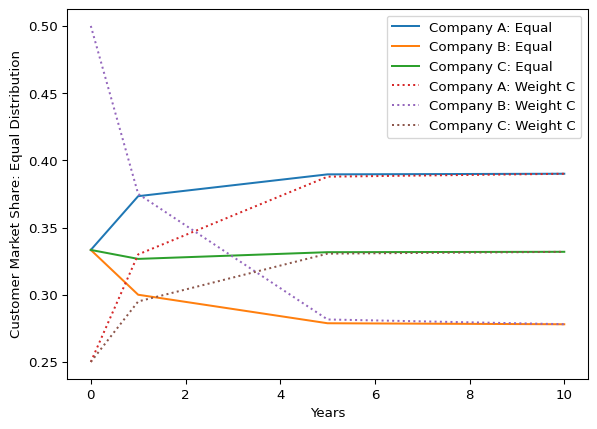

In [15]:
# Plan 1: Equal distribution
market = equal2
for i in range(3):
  plt.plot(time, [market[0][i], market[1][i], market[2][i], market[3][i]], label=f"Company {companies[i]}: Equal")
market = weight_b2
for i in range(3):
  plt.plot(time, [market[0][i], market[1][i], market[2][i], market[3][i]], label=f"Company {companies[i]}: Weight C", linestyle=":")
plt.ylabel('Customer Market Share: Equal Distribution')
plt.xlabel('Years')
plt.legend()
plt.show()

This is a really nice plot!

As demonstrated, Company A’s performance evens out through all
distributions. We will now overlay a few distributions comparing the
original plan to Plan 2.

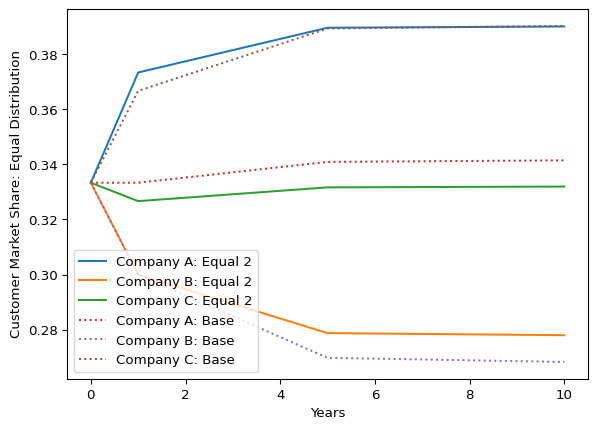

In [16]:
market = equal2
for i in range(3):
  plt.plot(time, [market[0][i], market[1][i], market[2][i], market[3][i]], label=f"Company {companies[i]}: Equal 2")
market = base_equal
for i in range(3):
  plt.plot(time, [market[0][i], market[1][i], market[2][i], market[3][i]], label=f"Company {companies[i]}: Base", linestyle=":")
plt.ylabel('Customer Market Share: Equal Distribution')
plt.xlabel('Years')
plt.legend(loc=3)
plt.show()

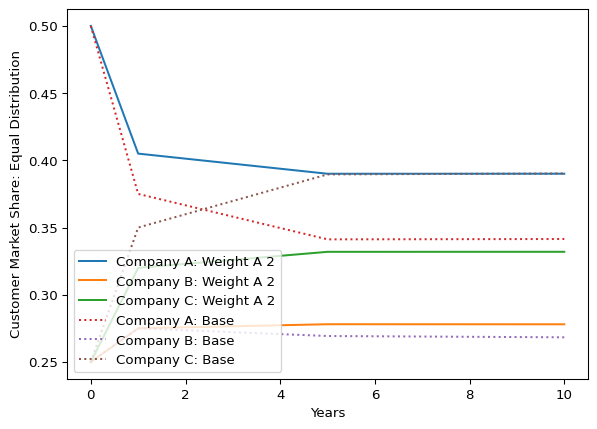

In [17]:
market = weight_a2
for i in range(3):
  plt.plot(time, [market[0][i], market[1][i], market[2][i], market[3][i]], label=f"Company {companies[i]}: Weight A 2")
market = base_a
for i in range(3):
  plt.plot(time, [market[0][i], market[1][i], market[2][i], market[3][i]], label=f"Company {companies[i]}: Base", linestyle=":")
plt.ylabel('Customer Market Share: Equal Distribution')
plt.xlabel('Years')
plt.legend(loc=3)
plt.show()

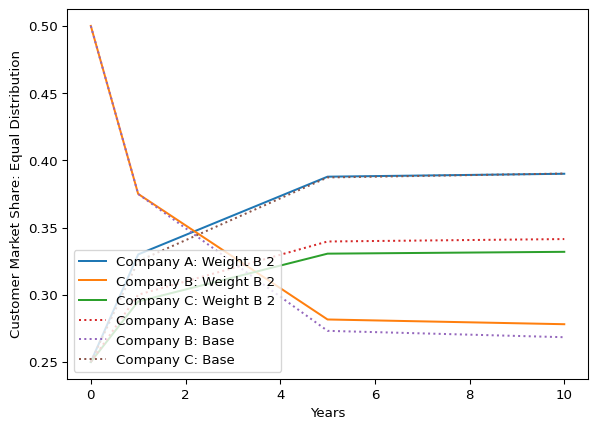

In [18]:
market = weight_b2
for i in range(3):
  plt.plot(time, [market[0][i], market[1][i], market[2][i], market[3][i]], label=f"Company {companies[i]}: Weight B 2")
market = base_b
for i in range(3):
  plt.plot(time, [market[0][i], market[1][i], market[2][i], market[3][i]], label=f"Company {companies[i]}: Base", linestyle=":")
plt.ylabel('Customer Market Share: Equal Distribution')
plt.xlabel('Years')
plt.legend(loc=3)
plt.show()

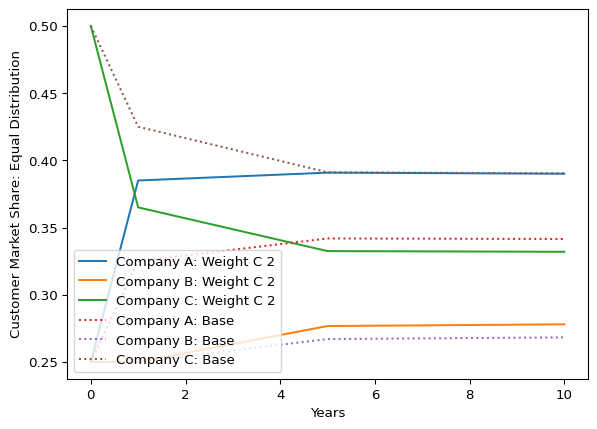

In [19]:
market = weight_c2
for i in range(3):
  plt.plot(time, [market[0][i], market[1][i], market[2][i], market[3][i]], label=f"Company {companies[i]}: Weight C 2")
market = base_c
for i in range(3):
  plt.plot(time, [market[0][i], market[1][i], market[2][i], market[3][i]], label=f"Company {companies[i]}: Base", linestyle=":")
plt.ylabel('Customer Market Share: Equal Distribution')
plt.xlabel('Years')
plt.legend(loc=3)
plt.show()

As demonstrated, A performs consistently better under Plan 2 than the
original plan. Thus, we can see that it would be ideal for the company
to undergo marketing strategies to implement plan 2. However, we must
consider the market distributions: all distributions provided assume no
company has more than 50% of the market share. However, as displayed
below, even if we start with 0 market share, our new marketing strategy
will propel us to the largest market holder within a 10 year period.

In [20]:
(plan2 ** 10) * sp.Matrix([0.0, 0.99, .01])

I suspect your conclusions may be correct here – but I can’t tell for
sure because I don’t know what the code is doing.

I get it; this is how my code often looks as well. It’s been a real
challenge over the years to train myself to write code that is clear and
easy to understand. It’s a skill that takes time to develop, but it’s
worth it.

When you want to be able to come back and understand what you’ve done,
and especially if you want others to understand what you’ve done, your
code will need a bunch of changes.

First, you should look for areas of repeated code and make these into
functions.

Then you should think about how to logically order the functions, and
how to name everything so that it’s very clear how your code corresponds
to what you are trying to do mathematically. It may be helpful to first
write (in Markdown cells) what you are computing, with formulas, and
then give the code.

Finally, you should add comments to your code to explain what each part
is doing.

If you use an editor that supports CoPilot or a similar AI code editing
tool, this can be very helpful: you can take a bit of code and ask the
AI to “make this more efficient”. You’ll want to make sure then that you
go over it carefully to make sure it’s still correct and that you
understand what it’s doing; the AI can do a good job too with “explain
this”. For my code, I’ve been using VSCode with the Jupyter extension
and the CoPilot plugin, all free. (Alternatively, you could use Quarto,
which is a document format that lets you write in Markdown with Python
code in blocks. I find it easier to think when I don’t have to put every
bit of prose inside its own separate block, but YMMV. For writing these
comments, I converted your homework file to Quarto; am happy to share
this file with you if you’re curious.)

Once you have gotten the code into shape, it would be great to look
again at your conclusions and see if you can understand what about the
matrices tells you that e.g. Plan 2 really is best for your company.

Grade: R

# *Sports Ranking*

In [21]:
# Do imports
import networkx as nx
import matplotlib.pyplot as plt
import scipy
import numpy as np

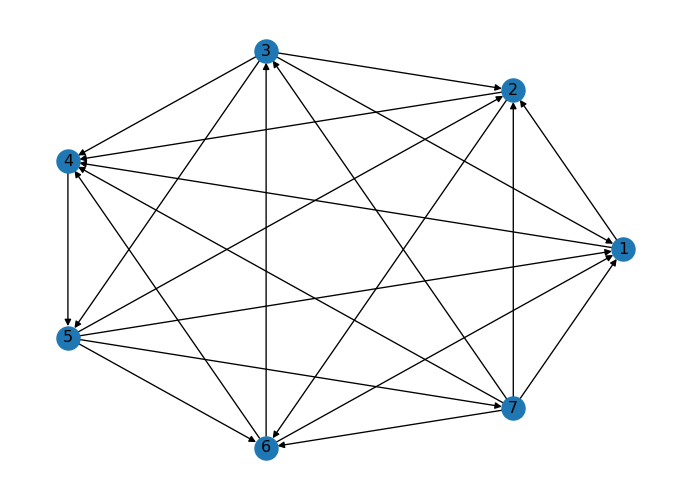

In [22]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes
G.add_nodes_from([1, 2, 3, 4, 5, 6, 7])

# Add vertices
edges = [(1,2),(7,3),(2,4),(4,5),(3,2),(5,1),(6,1),(3,1),(7,2),(2,6), (3, 4), (7,4),(5,7),(6,4),(3,5),(5,6),(7,1),(5,2),(7,6),(1,4),(6,3)]
G.add_edges_from(edges)

# Draw the graph
nx.draw_circular(G, with_labels=True)
plt.show()

In [23]:
adj_matrix = nx.adjacency_matrix(G).toarray()
adj_matrix

array([[0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0],
       [1, 1, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [1, 1, 0, 0, 0, 1, 1],
       [1, 0, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 0, 1, 0]])

In [24]:
# Power Matrix
power_matrix = adj_matrix + adj_matrix ** 2
power_matrix

array([[0, 2, 0, 2, 0, 0, 0],
       [0, 0, 0, 2, 0, 2, 0],
       [2, 2, 0, 2, 2, 0, 0],
       [0, 0, 0, 0, 2, 0, 0],
       [2, 2, 0, 0, 0, 2, 2],
       [2, 0, 2, 2, 0, 0, 0],
       [2, 2, 2, 2, 0, 2, 0]])

In [25]:
# Calculating team ranking with the power matrix
power_sum = [sum(power_matrix[i]) for i in range(7)]
rrank = np.argsort(power_sum)
rank = np.flip(rrank + 1)
rank

array([7, 5, 3, 6, 2, 1, 4])

In [26]:
# Calculating team ranking with reverse pagerank: calculate diagonal matrix D
adjT = adj_matrix.T
D = np.zeros((7, 7))
for i in range(7):
  D[i][i] = 1 / sum(adjT[i])

In [27]:
# Determine P = ATD -> (AT)TD = AD with alpha a = 0.85, teleporation vector 1/7 e_7)
P = sp.Matrix(sp.Matrix(adj_matrix) * sp.Matrix(D))
a = 0.85
v = sp.Matrix(np.ones(7) * 1/7)

In [28]:
# Solve for x
M = (sp.eye(7) - a * P)
b = (1 - a) * v
sol = M.solve(b)
x = np.array([sol[i] for i in range(7)], dtype='float')
x

array([0.05966732, 0.07966581, 0.17626964, 0.12535158, 0.24452472,
       0.13033224, 0.18418869])

In [29]:
# Find ranking
pr_rank = np.flip(np.argsort(x))+1
pr_rank

array([5, 7, 3, 6, 4, 2, 1])

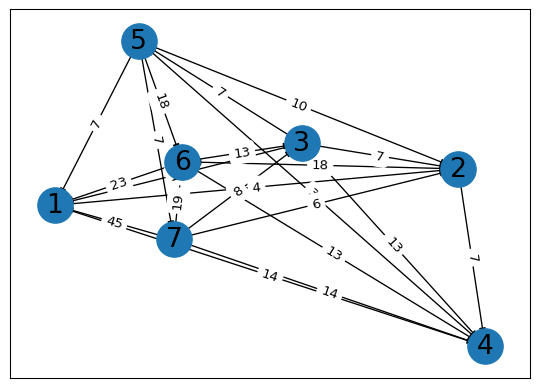

In [30]:
# Create a weighted directed graph
G = nx.DiGraph()

# Add nodes
G.add_nodes_from([1, 2, 3, 4, 5, 6, 7])

# Add vertices
edges = [(1,2),(7,3),(2,4),(4,5),(3,2),(5,1),(6,1),(3,1),(7,2),(2,6), (3, 4), (7,4),(5,7),(6,4),(3,5),(5,6),(7,1),(5,2),(7,6),(1,4),(6,3)]
length = len(edges)
weight = [4,8,7,3,7,7,23,15,6,18,13,14,7,13,7,18,45,10,19,14,13]
for i in range(length):
  G.add_edge(edges[i][0], edges[i][1], weight=weight[i])

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=edges, width=1)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

plt.show()

In [31]:
# Replace adjacency booleans with weights
weight_adj = adj_matrix
for i in range(length):
  weight_adj[edges[i][0]-1, edges[i][1]-1] = weight[i]
weight_adj

array([[ 0,  4,  0, 14,  0,  0,  0],
       [ 0,  0,  0,  7,  0, 18,  0],
       [15,  7,  0, 13,  7,  0,  0],
       [ 0,  0,  0,  0,  3,  0,  0],
       [ 7, 10,  0,  0,  0, 18,  7],
       [23,  0, 13, 13,  0,  0,  0],
       [45,  6,  8, 14,  0, 19,  0]])

In [32]:
weight_power = weight_adj + weight_adj**2
weight_power_sum = [sum(weight_power[i]) for i in range(7)]
rrank_weight = np.argsort(weight_power_sum)
rank_weight = np.flip(rrank_weight + 1)
rank_weight

array([7, 6, 5, 3, 2, 1, 4])

In [33]:
# Calculating team ranking with reverse pagerank: calculate diagonal matrix D
adjT_weight = weight_adj.T
D = np.zeros((7, 7))
for i in range(7):
  D[i][i] = 1 / sum(adjT_weight[i])
# Determine P = ATD -> (AT)TD = AD with alpha a = 0.85, teleporation vector 1/7 e_7)
P = sp.Matrix(sp.Matrix(weight_adj) * sp.Matrix(D))
a = 0.85
v = sp.Matrix(np.ones(7) * 1/7)
# Solve for x
M = (sp.eye(7) - a * P)
b = (1 - a) * v
sol = M.solve(b)
x = np.array([sol[i] for i in range(7)], dtype='float')
# Find ranking
pr_rank = np.flip(np.argsort(x))+1
pr_rank

array([5, 3, 7, 6, 4, 2, 1])

Here the code is a bit more straightforward, so I’m more able to follow
along. You also have a bit more commenting in the code, which is
helpful, but it could still use more.

However, we don’t have any Markdown blocks at all to describe your
thinking and how it relates mathematically to the text, etc.

You should start with an introduction to the problem, what you are
trying to learn. Then you should describe for each step what you are
trying to accomplish and how it differs from previous steps. Then, once
you have a result, you’ll want to explain what it means and how it
relates to the original problem.

Grade: R

# *Iso Rank*

In [34]:
# Construct adjacency matrices for A,B,C,D,E and 1,2,3,4,5
# G1 = A,B,C,D,E
# G2 = 1,2,3,4,5
np_G1 = np.matrix([
    [0,1,1,0,1],
    [1,0,0,1,0],
    [1,0,0,0,0],
    [0,1,0,0,0],
    [1,0,0,0,0]
], dtype='float')
np_G2 = np.matrix([
    [0,0,1,0,0],
    [0,0,1,0,0],
    [1,1,0,1,0],
    [0,0,1,0,1],
    [0,0,0,1,0]
], dtype='float')
G1T = np_G1.transpose()
G2T = np_G2.transpose()
for i in range(5):
  G1T[i] /= np.sum(G1T[i])
  G2T[i] /= np.sum(G2T[i])
G1 = sp.Matrix(np.transpose(G1T))
G2 = sp.Matrix(np.transpose(G2T))
G2

In [35]:
# Construct G2 x G1 (Outer x Inner) surfing matrix
M = sp.zeros(25)
for h in range(5):
  for k in range(5):
    for i in range(5):
      for j in range(5):
        M[i+5*(h), j+5*(k)] = G2[h, k] * G1[i, j]
M

In [36]:
# Calculate x given alpha = 0.85, v = 1/25 * e25
a = 0.85
v = 1/25 * sp.Matrix(np.ones(25))
mat = (sp.eye(25) - a * M)
b = (1-a)*v
x = mat.solve(b)
x

In [37]:
import math
iso = sp.zeros(5,5)
for i in range(5):
  for j in range(5):
    iso[i, j] = x[i + 5 * j]
temp = iso
iso

Row Labels: A,B,C,D,E. Column Labels: 1,2,3,4,5. Thus, the best match is
immediately A:3

In [38]:
temp.row_del(0)
temp.col_del(2)
temp

Next match is clearly B:4

In [39]:
temp.row_del(0)
temp.col_del(2)
temp

Next choice C:1, C:2, E:1, E:2. We choose E:1

In [40]:
temp.row_del(2)
temp.col_del(0)
temp

We round-off with C:2, D:5. Thus, our Final matching is A:3, B:4, C:2,
D:5, E:1. This is 100% accurate with our original graph, thus we have
found a bijective mapping.

We now consider Figure 2.12 with e = {B,C} removed

In [41]:
# G1 = P, G2 = Q
np_P = np.matrix([
    [0,1,1],
    [1,0,1],
    [1,1,0]
], dtype='float')
np_Q = np.matrix([
    [0,1,0,1,0],
    [1,0,0,1,0],
    [0,0,0,1,0],
    [1,1,1,0,1],
    [0,0,0,1,0]
], dtype='float')
PT = np_P.transpose()
QT = np_Q.transpose()
for i in range(5):
  QT[i] /= np.sum(QT[i])
for i in range(3):
  PT[i] /= np.sum(PT[i])
P = sp.Matrix(np.transpose(PT))
Q = sp.Matrix(np.transpose(QT))
P

In [42]:
# Contruct N = Q x P
N = sp.zeros(15)
for h in range(5):
  for k in range(5):
    for i in range(3):
      for j in range(3):
        N[i+3*(h), j+3*(k)] = Q[h, k] * P[i, j]
N

In [43]:
# Solve for X
a = 0.85
v = 1/15 * sp.Matrix(np.ones(15))
mat = (sp.eye(15) - a * N)
b = (1-a)*v
x = mat.solve(b)
x

In [44]:
iso = sp.zeros(3,5)
for i in range(3):
  for j in range(5):
    iso[i, j] = x[i + 3 * j]
temp = iso
iso

Column (Top) Labels: A, B, C, D, E. Row (Side) Labels: 1, 2, 3. Best
matchings: \[(D:1 or D:2 or D:3), ((A:2 or A:3 or B:2 or B:3) or (A:1 or
A:3 or B:1 or B:3) or (A:1 or A:2 or B:1 or B:2)), choose the remaining
A or B)\]

In [45]:
# Solve for A, B
A_adj = np.matrix([
    [0,1,0],
    [0,0,1],
    [1,0,0]
], dtype='float')
# The fourth row of Q should be the zero vector, we elect to replace with the one
# vector to find our correction vector
B_adj = np.matrix([
    [0,0,1,0,0],
    [1,0,0,0,0],
    [0,1,0,1,0],
    [1,1,1,1,1],
    [0,1,0,0,0]
], dtype='float')
for i in range(5):
  B_adj[i] /= np.sum(B_adj[i])
for i in range(3):
  A_adj[i] /= np.sum(A_adj[i])
A = A_adj.transpose()
B = B_adj.transpose()

In [46]:
# Construct C = B x A
# Contruct N = Q x P
C = sp.zeros(15)
for h in range(5):
  for k in range(5):
    for i in range(3):
      for j in range(3):
        C[i+3*(h), j+3*(k)] = B[h, k] * A[i, j]
C

In [47]:
# Solve for X
a = 0.85
v = 1/15 * sp.Matrix(np.ones(15))
mat = (sp.eye(15) - a * C)
b = (1-a)*v
x = mat.solve(b)
x

In [48]:
iso = sp.zeros(3,5)
for i in range(3):
  for j in range(5):
    iso[i, j] = x[i + 3 * j]
temp = iso
iso

Column Labels: A,B,C,D,E Row Labels: 1,2,3 Possible matchings: \[(C:1 or
C:2 or C:3), ((A:2 or A:3), (A:1 or A:3), (A:1 or A:2), choose B:k where
k is the remaining row. The best matching is \[(C:1 or C:2 or C:3), (A:3
or A:1 or A:2), (B:2 or B:3 or B:1)\] choosing each one respectively
(i.e. choosing C:1 (index 0) chooses A:3 and B:2)

Same as above!

Grade: R